# Lab 3: Clustering and Manifold Learning

This notebook demonstrates:
- the k-Means clustering algorithm
- the use of manifold-learning techniques to project a clustered dataset into a 2D space and visualise it as a scatterplot

It is assumed that the input dataset contains ___only numerical___ attributes. To use this code with a dataset that contains categorical attributes, they first need to be _somehow_ transformed to numerical. How categorical attributes can be represented as numerical may depend on the nature of the dataset.

When you go through this notebook for the first time you may __skip section C__ and go back to it at the end.

### A. Import Python Modules and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import manifold #needed for multidimensional scaling (MDS) and t-SNE
from sklearn import cluster #needed for k-Means clustering
from sklearn import preprocessing #needed for scaling attributes to the nterval [0,1]

#### Load the dataset

In [2]:
df = pd.read_csv("./loans_train_prepared-1.csv")
data = np.array(df.values, dtype=float)
print('(number of examples, number of attributes): ', data.shape)

(number of examples, number of attributes):  (614, 16)


In [3]:
df.head()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0    0.000000         1.084523    1.058140              0.75               1   
1    0.333333         0.925883    1.047319              0.75               1   
2    0.000000         0.683858    0.635920              0.75               1   
3    0.000000         0.608992    1.002824              0.75               1   
4    0.000000         1.101869    1.115650              0.75               1   

   Gender_Male  Gender_nan  Married_Yes  Married_nan  Self_Employed_Yes  \
0            1           0            0            0                  0   
1            1           0            1            0                  0   
2            1           0            1            0                  1   
3            1           0            1            0                  0   
4            1           0            0            0                  0   

   Self_Employed_nan  Education_Not Graduate  Property_Area_Semiurban  \
0                  0                       0                        0   
1                  0                       0                        0   
2                  0                       0                        0   
3                  0                       1                        0   
4                  0                       0                        0   

   Property_Area_Urban  Loan_Status_Y  TotalIncome  
0                    1              1     0.841086  
1                    0              0     0.871711  
2                    1              1     0.385189  
3                    1              1     0.717012  
4                    1              1     0.860305

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Dependents               614 non-null    float64
 1   ApplicantIncome          614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    int64  
 5   Gender_Male              614 non-null    int64  
 6   Gender_nan               614 non-null    int64  
 7   Married_Yes              614 non-null    int64  
 8   Married_nan              614 non-null    int64  
 9   Self_Employed_Yes        614 non-null    int64  
 10  Self_Employed_nan        614 non-null    int64  
 11  Education_Not Graduate   614 non-null    int64  
 12  Property_Area_Semiurban  614 non-null    int64  
 13  Property_Area_Urban      614 non-null    int64  
 14  Loan_Status_Y            6

In [5]:
df.describe()

Dependents  ApplicantIncome  LoanAmount  Loan_Amount_Term  \
count  614.000000       614.000000  614.000000        614.000000   
mean     0.248100         0.916588    1.076222          0.713355   
std      0.336541         0.412366    0.338744          0.134226   
min      0.000000         0.004634    0.005026          0.025000   
25%      0.000000         0.662440    0.883668          0.750000   
50%      0.000000         0.815365    1.047319          0.750000   
75%      0.333333         1.078246    1.229571          0.750000   
max      1.000000         3.357480    2.461145          1.000000   

       Credit_History  Gender_Male  Gender_nan  Married_Yes  Married_nan  \
count      614.000000   614.000000  614.000000   614.000000   614.000000   
mean         0.855049     0.796417    0.021173     0.648208     0.004886   
std          0.352339     0.402991    0.144077     0.477919     0.069786   
min          0.000000     0.000000    0.000000     0.000000     0.000000   
25%          1.000000     1.000000    0.000000     0.000000     0.000000   
50%          1.000000     1.000000    0.000000     1.000000     0.000000   
75%          1.000000     1.000000    0.000000     1.000000     0.000000   
max          1.000000     1.000000    1.000000     1.000000     1.000000   

       Self_Employed_Yes  Self_Employed_nan  Education_Not Graduate  \
count         614.000000         614.000000              614.000000   
mean            0.133550           0.052117                0.218241   
std             0.340446           0.222445                0.413389   
min             0.000000           0.000000                0.000000   
25%             0.000000           0.000000                0.000000   
50%             0.000000           0.000000                0.000000   
75%             0.000000           0.000000                0.000000   
max             1.000000           1.000000                1.000000   

       Property_Area_Semiurban  Property_Area_Urban  Loan_Status_Y  \
count               614.000000           614.000000     614.000000   
mean                  0.379479             0.328990       0.687296   
std                   0.485653             0.470229       0.463973   
min                   0.000000             0.000000       0.000000   
25%                   0.000000             0.000000       0.000000   
50%                   0.000000             0.000000       1.000000   
75%                   1.000000             1.000000       1.000000   
max                   1.000000             1.000000       1.000000   

       TotalIncome  
count   614.000000  
mean      0.862686  
std       0.428068  
min       0.005599  
25%       0.597383  
50%       0.783902  
75%       1.035796  
max       3.207353

In [6]:
df.shape

(614, 16)

The dataset contains only numerical attributes.Also the data is prepared, hence no need to scale

## Task 2

1- Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. 

2- Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. 

3- Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.

4- Use at least two different methods for visualising the clustering. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

In [7]:
colors = np.array(['orange', 'blue', 'lime', 'black', 'khaki', 'pink', 'green', 'purple'])

# points - a 2D array of (x,y) coordinates of data points
# labels - an array of numeric labels in the interval [0..k-1], one for each point
# centers - a 2D array of (x, y) coordinates of cluster centers
# title - title of the plot


def clustering_scatterplot(points, labels, centers, title, ax):
    
    #plt.figure(figsize=(12,6))
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = ax.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))


    # plot the centers of the clusters
    if centers is not None:
        ax.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = ax.set_title(title)
    #_ = plt.legend()
    _ = ax.set_xlabel('x')
    _ = ax.set_ylabel('y')

In [8]:
# colors = np.array(['orange', 'blue', 'lime', 'black', 'khaki', 'pink', 'green', 'purple'])

# # points - a 2D array of (x,y) coordinates of data points
# # labels - an array of numeric labels in the interval [0..k-1], one for each point
# # centers - a 2D array of (x, y) coordinates of cluster centers
# # title - title of the plot


# def clustering_scatterplot(points, labels, centers, title):
    
#     plt.figure(figsize=(12,6))
#     n_clusters = np.unique(labels).size
#     for i in range(n_clusters):
#         h = plt.scatter(points[labels==i,0],
#                         points[labels==i,1], 
#                         c=colors[i%colors.size],
#                         label = 'cluster '+str(i))


#     # plot the centers of the clusters
#     if centers is not None:
#         ax.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

#     _ = plt.set_title(title)
#     _ = plt.legend()
#     _ = plt.set_xlabel('x')
#     _ = plt.set_ylabel('y')

In [9]:
min_max_scaler = preprocessing.MinMaxScaler()
data = min_max_scaler.fit_transform(data)

### 1-  Plot the sum of squared distances from the data points (in loans_train_prepared.csv) to the centers of the k-means clusters for various values of k. 


Calculate the sum of sqaured distance

In [10]:
sum_sqr_dis = []

# cluster range
K= range(2,6) 
for k in K:
    kmeans = cluster.KMeans(n_clusters=k,init='k-means++',n_init=1,max_iter=300).fit(data) 
    sum_sqr_dis.append(kmeans.inertia_)
 

Store clusters and centers into a dataframe

In [11]:
centers_df = pd.DataFrame({'Clusters':K,'Centers':sum_sqr_dis})
centers_df

Clusters     Centers
0         2  920.680183
1         3  772.996922
2         4  715.479582
3         5  694.450244

plot sum_sqr_dis vs number of clusters

### 2- Use the Elbow method to pick the best value of k. Attempt also another method for determining the best value of k. 


In [12]:
plt.figure(figsize=(6,4))
plt.grid()
plt.plot(K,sum_sqr_dis,'x--')
plt.xlabel("K = # of clusters")
plt.ylabel("Inertia")
plt.title("Sum of Sqrt Dist of all datapoints to the closest cluster center vs Number of Clusters")
plt.show()

**Conclusion:** The elbow forms at **$k$ = 3.**

### Use the Silhoutte method to cross compare with Elbow

In [13]:
import sklearn.metrics as metrics

In [14]:
sil_score = []

K = range(2,6)
for k in K:
    labels = cluster.KMeans(n_clusters=k,init='k-means++',n_init=1, max_iter=300).fit(data).labels_
    ss = metrics.silhouette_score(data,labels,metric='euclidean')
    sil_score.append(ss)
    
ss_df = pd.DataFrame({'Clusters':K,'Silhouette Score':sil_score})
ss_df

Clusters  Silhouette Score
0         2          0.186540
1         3          0.185119
2         4          0.190624
3         5          0.191016

In [15]:
plt.figure(figsize=(6,4))
plt.grid()
plt.plot(K,sil_score,'x--')
plt.xlabel("K = # of clusters")
plt.ylabel("Silhoutte Score")
plt.show()

### 3- Use the best value(s) of k to cluster the loans_train_prepared dataset with k-means. Aim at producing meaningful clustering.


1. Apply a manifold-learning technique to project the data set to a 2D space

Append the cluster centers to the dataset.

In [16]:
k = 3 # k optimal
clustered_data_sklearn = cluster.KMeans(n_clusters=k,init = 'k-means++',n_init=1, max_iter=300).fit(data)

In [17]:
data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]

2. Apply multi-dimensional scaling (MDS) to project both the data and the k-Means cluster centers to a 2D space

Project both the data and the k-Means cluster centers to 2D.

In [18]:
MDS_XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

/Users/mahmoua/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete


Plot the transformed examples and the centers. Use the cluster assignment to colour the examples.

3. Apply t-SNE to project both the data and the k-Means cluster centers to a 2D space

In [20]:
TSNE_XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
print("transformation complete")

transformation complete


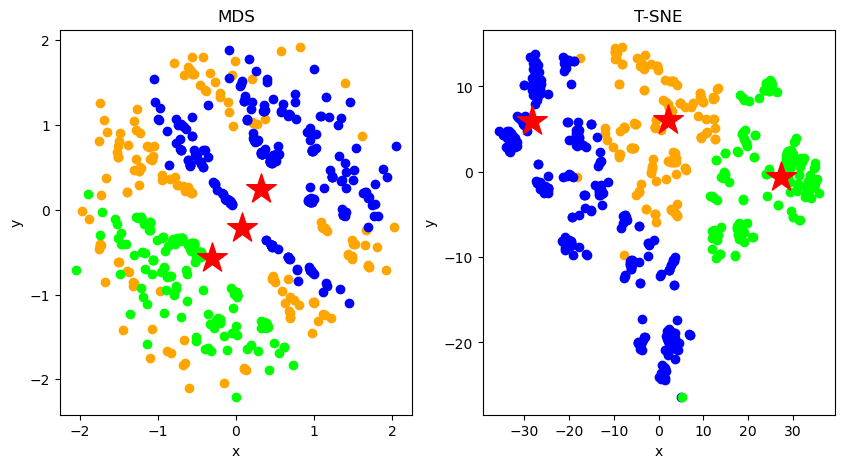

In [22]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10, 5))

    
clustering_scatterplot(points=MDS_XYcoordinates[:-k,:], 
                   labels=clustered_data_sklearn.labels_, 
                   centers=MDS_XYcoordinates[-k:,:], 
                   title='MDS', ax = ax1)

clustering_scatterplot(points=TSNE_XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=TSNE_XYcoordinates[-k:,:], 
                       title='T-SNE', ax = ax2)
    


### 4- Use at least two different methods for visualising the clustering. Write a short conclusion about the characteristics of the clusters (max 250 words in a markdown cell).

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer

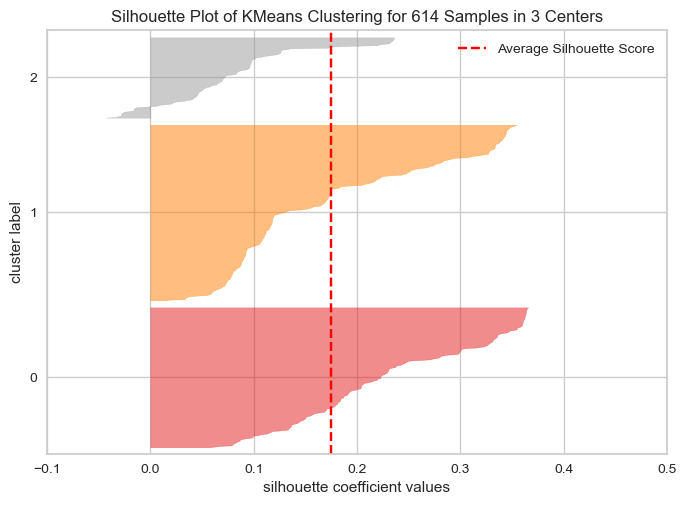

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 614 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [24]:
sil_visualizer = SilhouetteVisualizer(cluster.KMeans(n_clusters=k,init = 'k-means++',n_init=1, max_iter=300))
sil_visualizer.fit(data)    
sil_visualizer.show()

In [31]:
K = range(2,6)


for k in K:
    
    clustered_data_sklearn = cluster.KMeans(n_clusters=k,init = 'k-means++',n_init=1, max_iter=300).fit(data)
    data_and_centers = np.r_[data,clustered_data_sklearn.cluster_centers_]
    
    fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12, 6))
    
    MDS_XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)
    print("transformation complete")
    clustering_scatterplot(points=MDS_XYcoordinates[:-k,:], 
                       labels=clustered_data_sklearn.labels_, 
                       centers=MDS_XYcoordinates[-k:,:], 
                       title='MDS', ax = ax1)
    
    TSNE_XYcoordinates = manifold.TSNE(n_components=2).fit_transform(data_and_centers)
    print("transformation complete")
    clustering_scatterplot(points=TSNE_XYcoordinates[:-k,:], 
                           labels=clustered_data_sklearn.labels_, 
                           centers=TSNE_XYcoordinates[-k:,:], 
                           title='T-SNE',ax = ax2)
   
    sil_visualizer = SilhouetteVisualizer(clustered_data_sklearn,ax=ax3)
    sil_visualizer.fit(data)
    sil_visualizer.show()

        

/Users/mahmoua/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete
transformation complete


/Users/mahmoua/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete
transformation complete


/Users/mahmoua/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete
transformation complete


/Users/mahmoua/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


transformation complete
transformation complete


## Task 3

1- Use another clustering algorithm (from the ones available in scikit-learn) for the loans_train_prepared dataset and an appropriate manifold-learning technique to visualise it.
2- Discuss the differences between the k-Means clustering and the clustering found by the second algorithm you have tried in words (max 250 words in a markdown cell) and by visualising the clusterings with an appropriate manifold-learning technique.

In [26]:
from sklearn.cluster import AgglomerativeClustering

agc = AgglomerativeClustering(n_clusters=3, compute_distances=True).fit(data)
agc


AgglomerativeClustering(compute_distances=True, n_clusters=3)

In [27]:
AgglomerativeClustering(compute_distances=True, n_clusters=3)

AgglomerativeClustering(compute_distances=True, n_clusters=3)

In [28]:
agc_lables = agc.labels_

In [29]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,6))
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'), truncate_mode='level', p=5)
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean distance')

Text(0, 0.5, 'Euclidean distance')

In [34]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2,assign_labels='discretize',random_state=0).fit(data)
clustering.labels_
# >>> clustering
# SpectralClustering(assign_labels='discretize', n_clusters=2,
#     random_state=0)
# clustering

SpectralClustering(assign_labels='discretize', n_clusters=2, random_state=0)

transformation complete
transformation complete
transformation complete
transformation complete


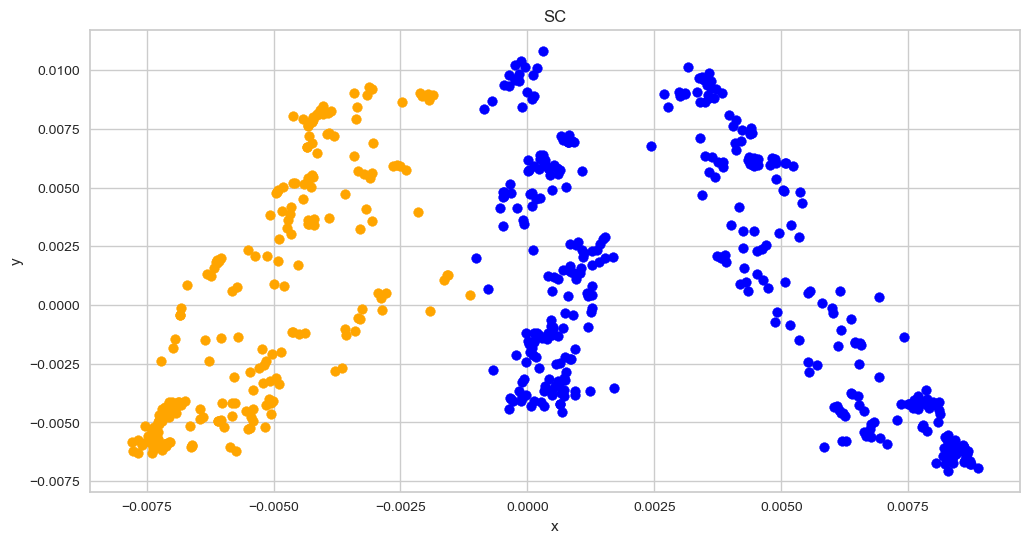

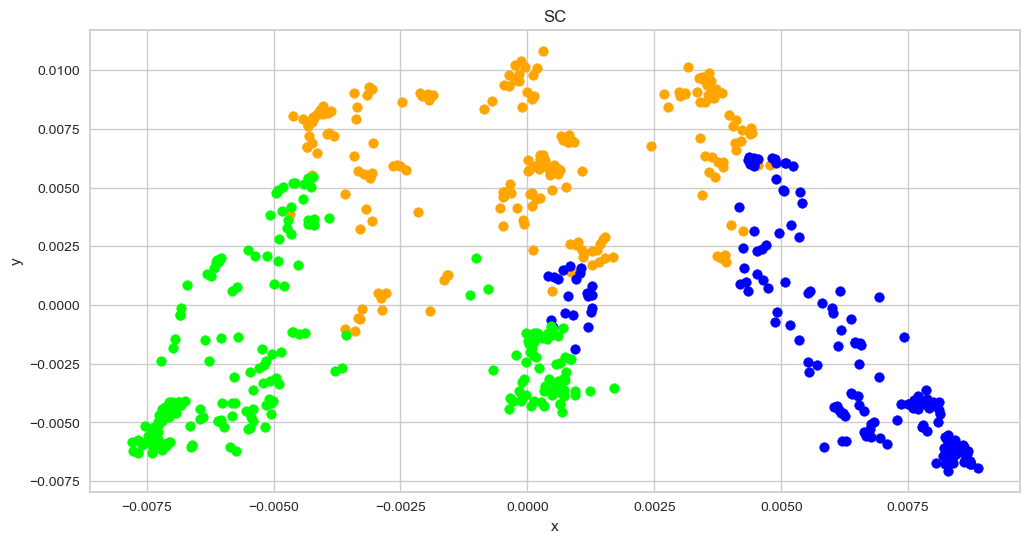

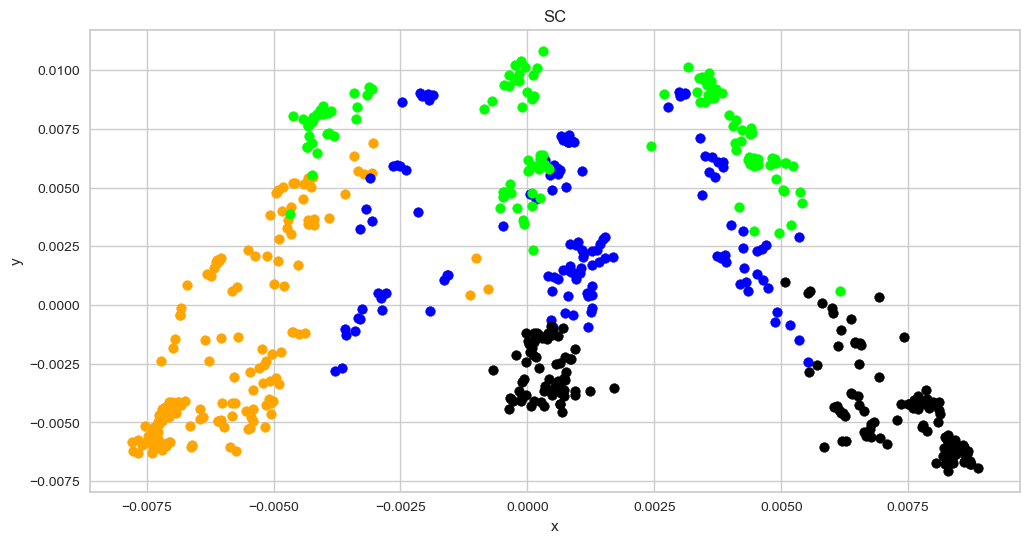

In [44]:
# data_and_centers = np.r_[data,clustering.cluster_centers_]

K = range(2,6)

for k in K:
    fig, (ax4) = plt.subplots(figsize=(12, 6))
    
    clustering = SpectralClustering(n_clusters=k,assign_labels='discretize',random_state=0).fit(data)
    clustering.labels_

    SC_XYcoordinates = manifold.SpectralEmbedding(n_components=2).fit_transform(data)
    print("transformation complete")
    clustering_scatterplot(points=SC_XYcoordinates, 
                       labels=clustering.labels_, 
                       centers=None, 
                       title='SC', ax = ax4)
